In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the base directory path where the Excel files are located
directory_path = '../../data/execution_time_results/'

# Define the subdirectories for different models
models = ['BASELINE', 'GRU', 'LSTM', 'SARIMA','TBATS']

# Define the data locations for NRMSE and NMAE for each forecast period
data_locations = {
    '14 Days Forecast': {'Time(s)': {'14 Days Training': (3, 'B:K'), 'Training:Testing = 75:25': (3, 'R:AA'), 'Training:Testing = 50:50': (3, 'AH:AQ')}},
    '7 Days Forecast': {'Time(s)': {'14 Days Training': (7, 'B:K'), 'Training:Testing = 75:25': (7, 'R:AA'), 'Training:Testing = 50:50': (7, 'AH:AQ')}},
    '3 Days Forecast': {'Time(s)': {'14 Days Training': (11, 'B:K'), 'Training:Testing = 75:25': (11, 'R:AA'), 'Training:Testing = 50:50': (11, 'AH:AQ')}},
    '1 Day Forecast': {'Time(s)': {'14 Days Training': (15, 'B:K'), 'Training:Testing = 75:25': (15, 'R:AA'), 'Training:Testing = 50:50': (15, 'AH:AQ')}}
}

# Initialize list to store combined data
combined_data = []

# Iterate over each model directory
for model in models:
    model_path = os.path.join(directory_path, model)
    
    # List all Excel files in the directory
    excel_files = [f for f in os.listdir(model_path) if f.endswith('.xlsx')]
    
    # Iterate over each Excel file
    for file in excel_files:
        file_path = os.path.join(model_path, file)
        
        # Iterate over each forecast period to extract NRMSE and NMAE data
        for forecast_period, metrics in data_locations.items():
            for metric, training_methods in metrics.items():
                for training_method, (row, columns) in training_methods.items():
                    try:
                        # Load data from specified range of Excel file
                        df = pd.read_excel(file_path, usecols=columns, skiprows=row, nrows=1, header=None)
                        # Flatten the data and extend the combined_data list
                        values = df.values.flatten().tolist()
                        combined_data.extend([(model, forecast_period, metric, training_method, value) for value in values])
                    except Exception as e:
                        print(f"Error reading {file_path} for {forecast_period}, {metric}, {training_method}: {e}")

# Convert the combined data list to DataFrame for plotting
combined_df = pd.DataFrame(combined_data, columns=['Model', 'Forecast Period', 'Metric', 'Training Method', 'Time'])

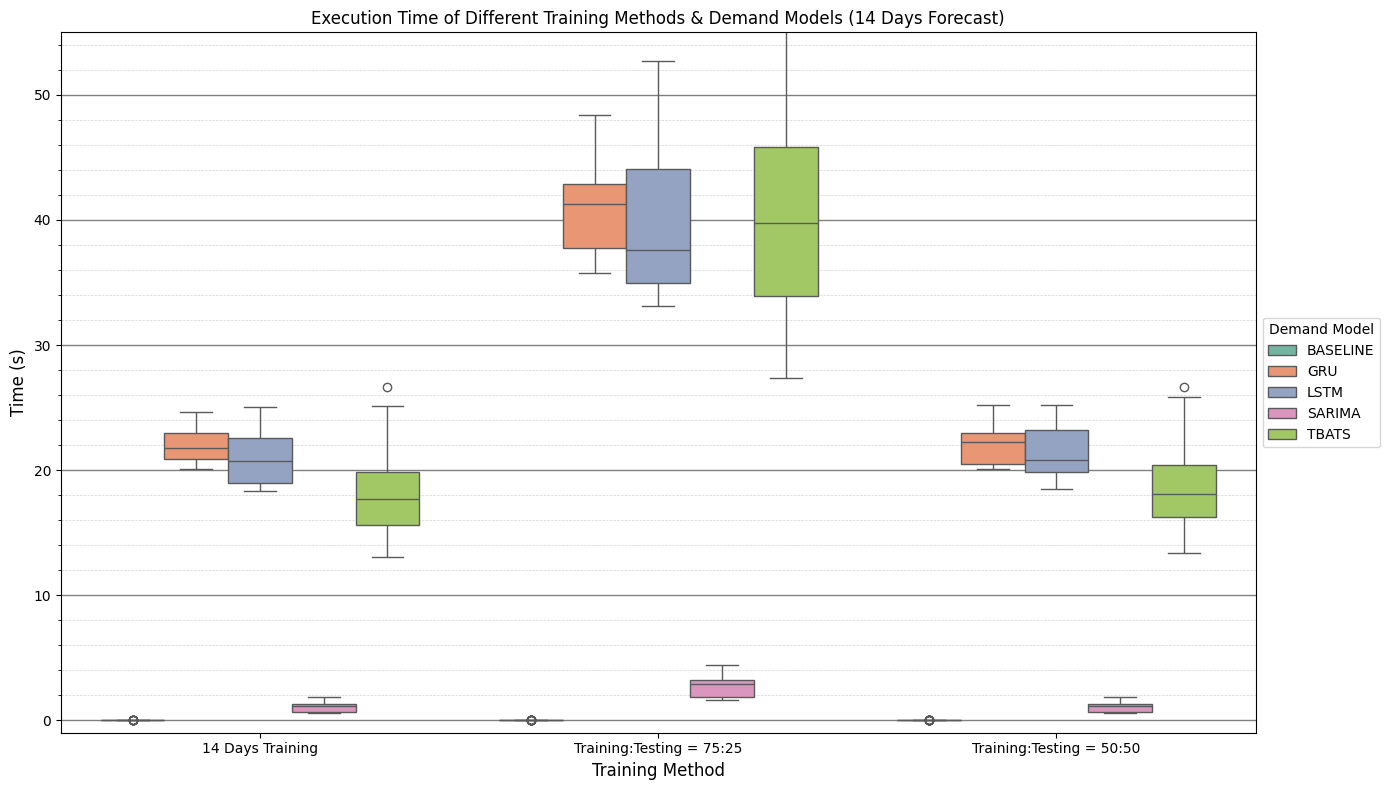

<Figure size 640x480 with 0 Axes>

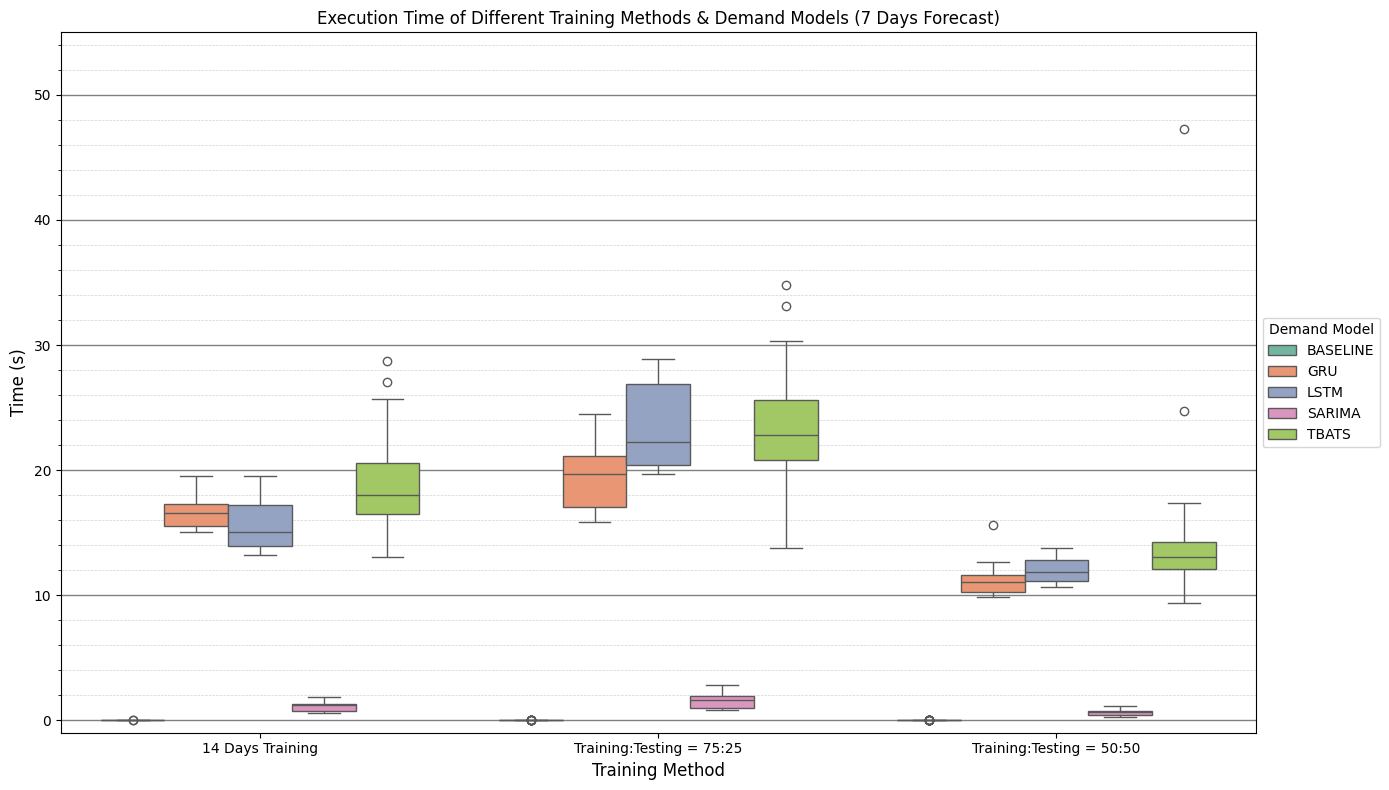

<Figure size 640x480 with 0 Axes>

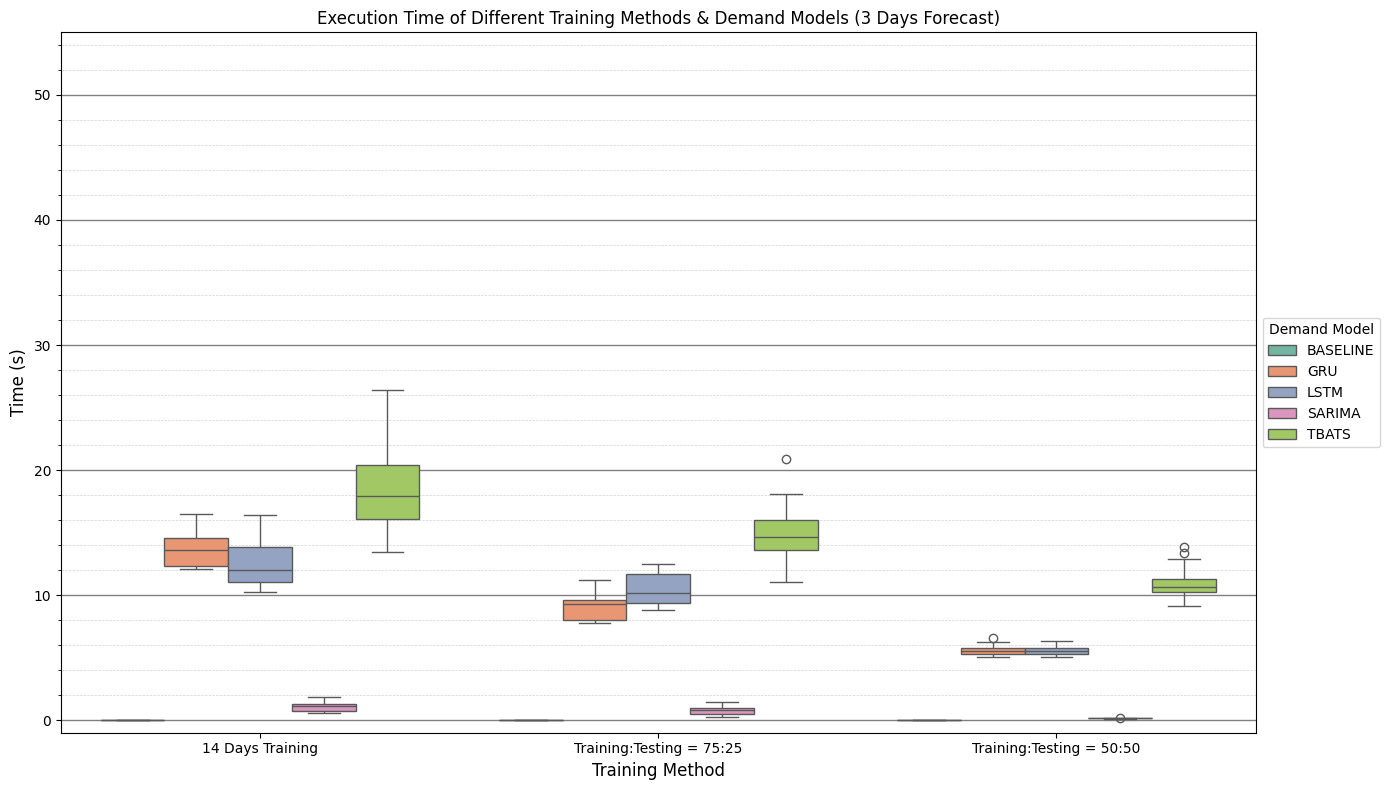

<Figure size 640x480 with 0 Axes>

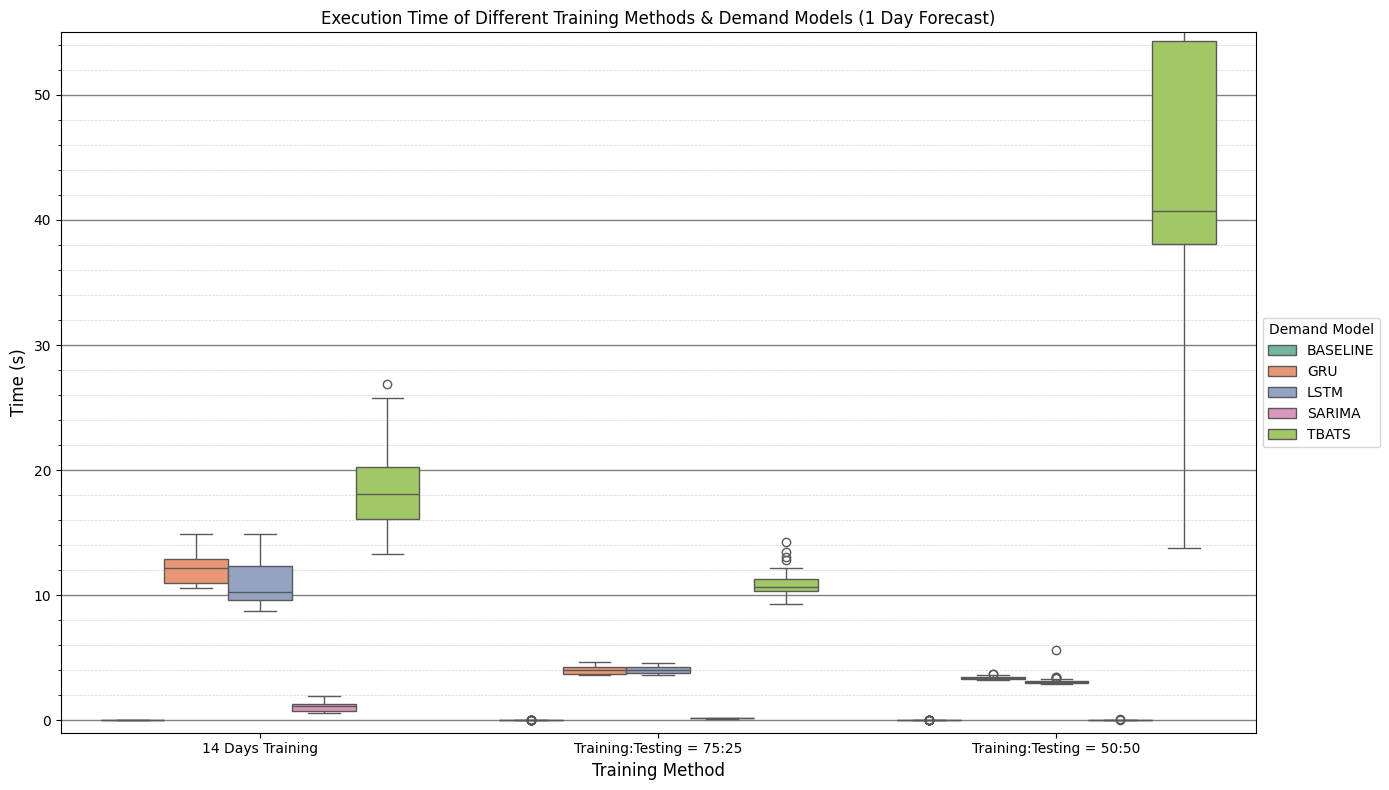

<Figure size 640x480 with 0 Axes>

In [3]:
# Execution Time of Different Training Methods and Demand Models for Specific Forecast Period

# Loop through each forecast period to create and save a separate plot
for forecast_period in data_locations.keys():
    # Filter the DataFrame for the current forecast period
    period_df = combined_df[combined_df['Forecast Period'] == forecast_period]

    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.set_facecolor('white')

    ## Plotting the boxplot
    sns.boxplot(data=period_df, x='Training Method', y='Time', hue='Model', palette='Set2')
    
    # Set tighter y-axis scale
    ax.set_ylim(-1, 55)

    # Enabling minor ticks and setting up grid lines
    ax.minorticks_on()
    ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
    ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.xaxis.set_tick_params(which='minor', bottom=False)

    # Setting up x-axis and y-axis labels
    ax.set_xlabel('Training Method', fontsize=12)
    ax.set_ylabel('Time (s)', fontsize=12)

    # Setting title and legend
    plt.title(f'Execution Time of Different Training Methods & Demand Models ({forecast_period})')
    plt.legend(title='Demand Model', bbox_to_anchor=(1, 0.5), loc='center left')
    plt.tight_layout()

     # Check if the target directory exists
    target_dir = '../../visualisations/execution_time'
    if not os.path.isdir(target_dir):
        os.makedirs(target_dir)

    # Define the file name based on model and forecast period, then save the plot
    file_name = os.path.join(target_dir, f'{forecast_period.lower().replace(" ", "_")}_execution_time.png')
    plt.savefig(file_name)
    
    # Display the plot
    plt.show()
    
    # Clear the current figure to prepare for the next plot
    plt.clf()

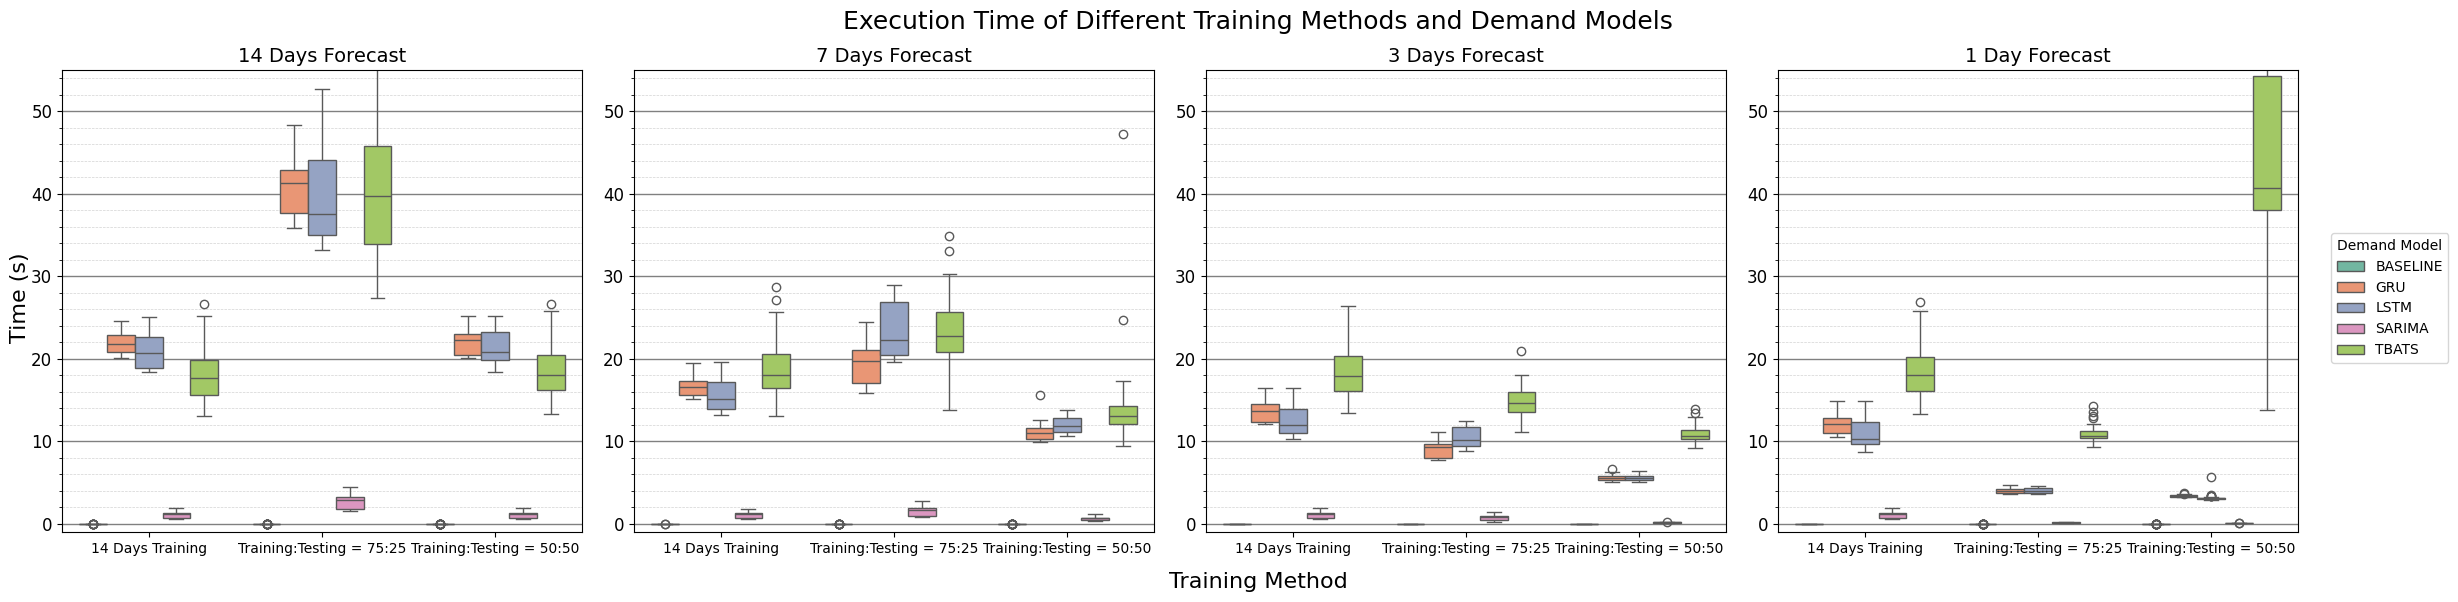

In [4]:
# Execution Time of Different Training Methods and Demand Models Row

# Creating plot
fig, axes = plt.subplots(ncols=len(data_locations), nrows=1, figsize=(26, 6))

# Loop through each forecast period to create and save a separate plot
for i, forecast_period in enumerate(data_locations.keys()):
    ax = axes[i]
    # Filter the DataFrame for the current forecast period
    period_df = combined_df[combined_df['Forecast Period'] == forecast_period]

    # Plotting the boxplot
    sns.boxplot(data=period_df, x='Training Method', y='Time', hue='Model', palette='Set2', ax=axes[i])

    # Set tighter y-axis scale
    ax.set_ylim(-1, 55)

    # Enabling minor ticks and setting up grid lines
    ax.minorticks_on()
    ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
    ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=12)

    # Setting up title
    ax.set_title(f'{forecast_period}', fontsize=14)

    # Remove X and Y labels from all subplots
    ax.set_xlabel('')
    ax.set_ylabel('')

# Removing each plots legend
for ax in axes:
    ax.get_legend().remove()

# Setting the subtitle and labels
fig.suptitle("Execution Time of Different Training Methods and Demand Models", fontsize=18)
fig.supylabel('Time (s)', fontsize=16)
fig.supxlabel('Training Method', fontsize=16)
fig.set_facecolor('white')

# Place and draw the legend on the figure
handles, labels = ax.get_legend_handles_labels()
legend = fig.legend(handles, labels, title='Demand Model', loc='center left', bbox_to_anchor=(0.91, 0.5))
fig.subplots_adjust(left=0.04, right=0.9, wspace=0.1)# Adjust the left and right margins and the width space between subplots

# Check if the target directory exists
target_dir = '../../visualisations/execution_time'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# Save the plot
file_name = os.path.join(target_dir, f'all_demand_models_training_methods_execution_time_row.png')
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.5)

# Display the plot
plt.show()


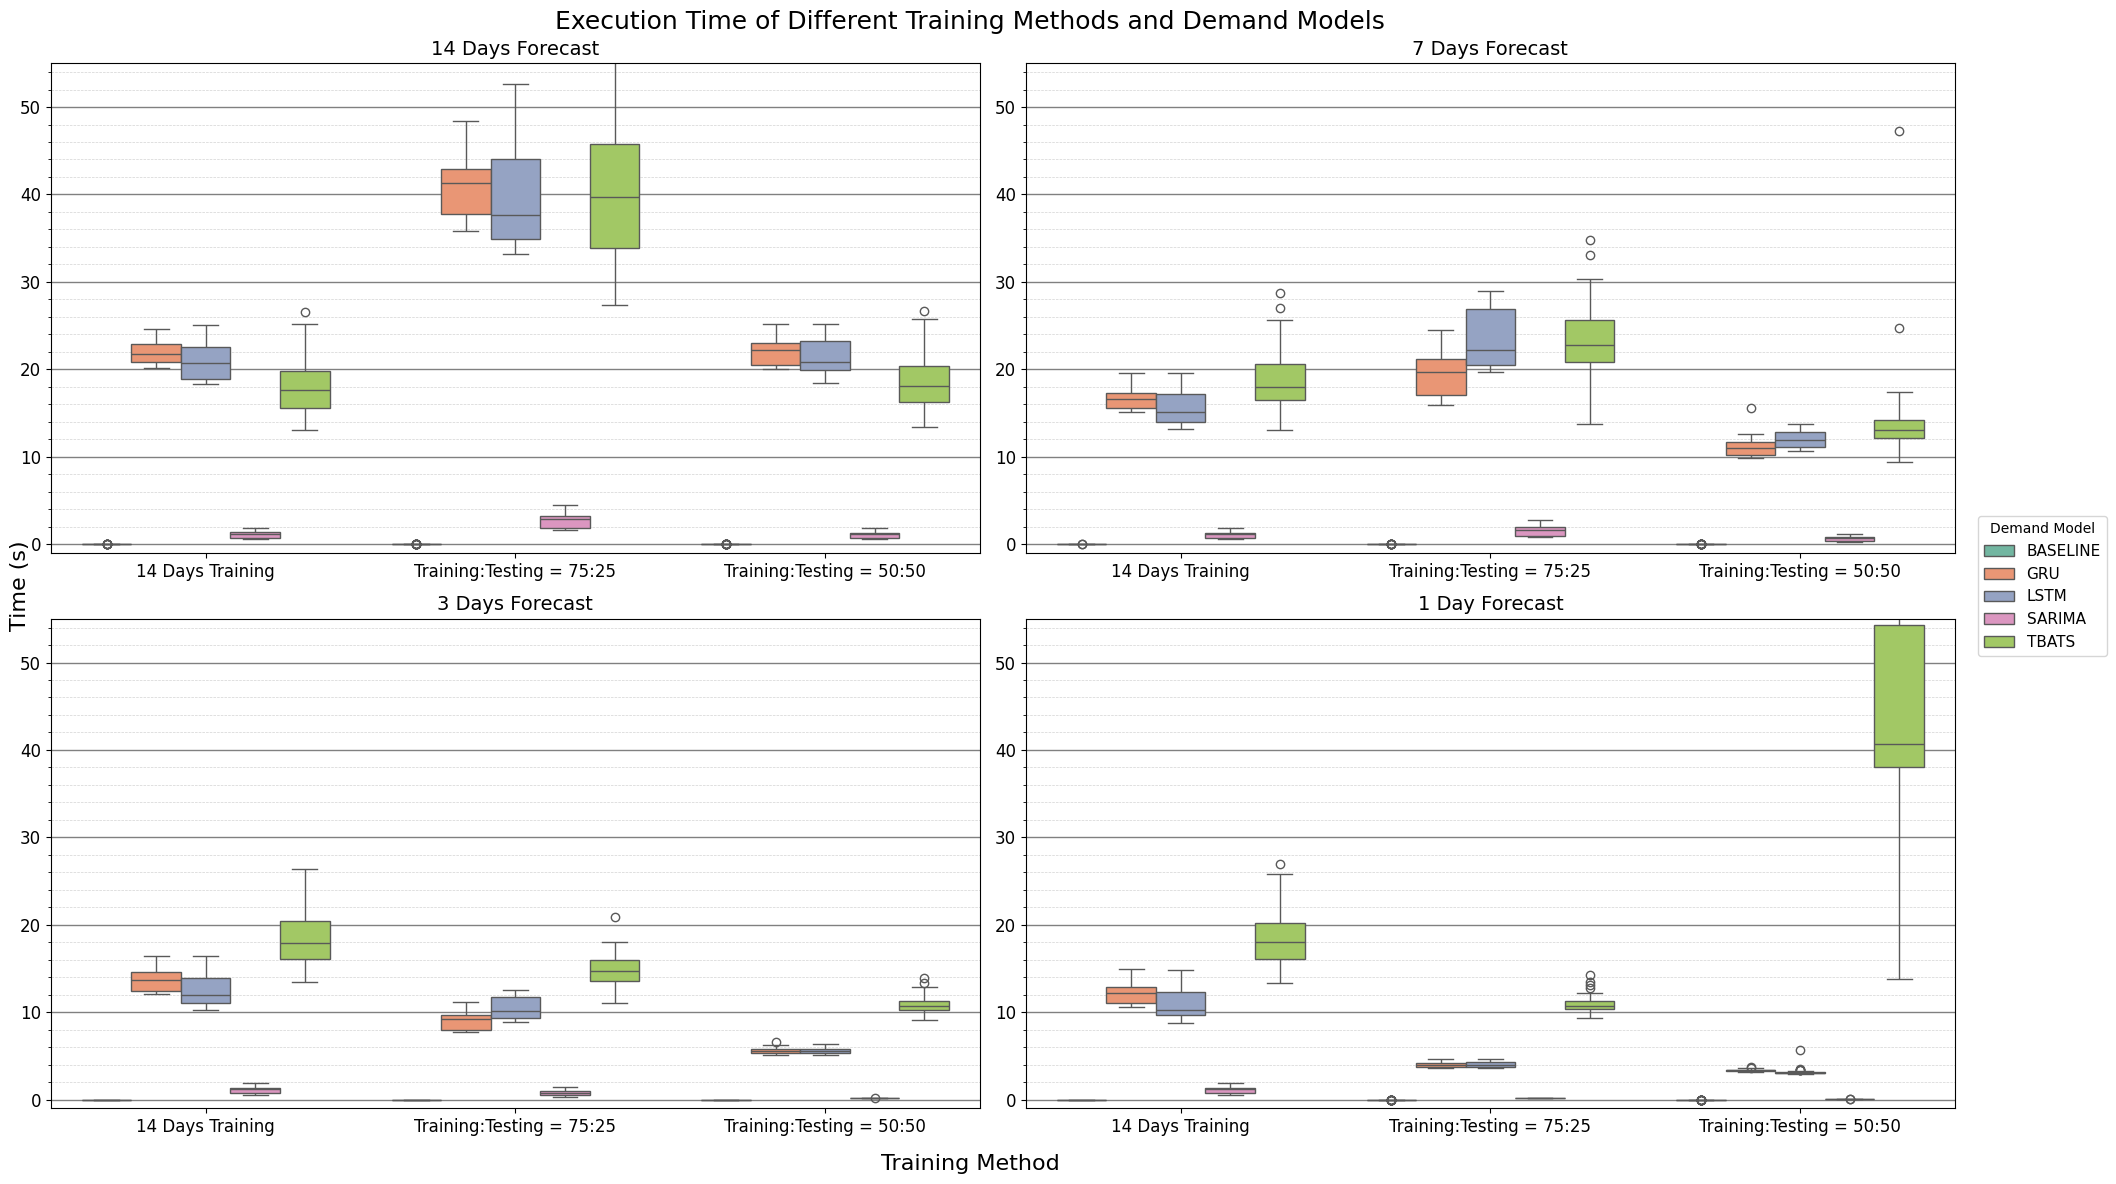

In [5]:
# Execution Time of Different Training Methods and Demand Models Grid

# Creating plot
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each forecast period to create and save a separate plot
for i, (forecast_period, ax) in enumerate(zip(data_locations.keys(), axes)):
    period_df = combined_df[combined_df['Forecast Period'] == forecast_period]

    # Plotting the boxplot
    sns.boxplot(data=period_df, x='Training Method', y='Time', hue='Model', palette='Set2', ax=ax)
    
    # Set tighter y-axis scale
    ax.set_ylim(-1, 55)

    # Enabling minor ticks and setting up grid lines
    ax.minorticks_on()
    ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
    ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.tick_params(axis='y', labelsize=12) 
    ax.tick_params(axis='x', labelsize=12) 

    # Setting up title
    ax.set_title(f'{forecast_period}', fontsize=14)

    # Remove X and Y labels from all subplots
    ax.set_xlabel('')
    ax.set_ylabel('')

# Removing each plots legend
for ax in axes:
    ax.get_legend().remove()

# Setting the subtitle and labels
fig.suptitle("Execution Time of Different Training Methods and Demand Models", fontsize=18)
fig.supylabel('Time (s)', fontsize=16)
fig.supxlabel('Training Method', fontsize=16)
fig.set_facecolor('white')

# Place and draw the legend on the figure
handles, labels = ax.get_legend_handles_labels()
legend = fig.legend(handles, labels, title='Demand Model', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)

# Adjust layout to make space for the overall title
plt.tight_layout()

# Check if the target directory exists
target_dir = '../../visualisations/execution_time'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# Save the plot
file_name = os.path.join(target_dir, f'all_demand_models_training_methods_execution_time_grid.png')
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.5)

# Display the plot
plt.show()


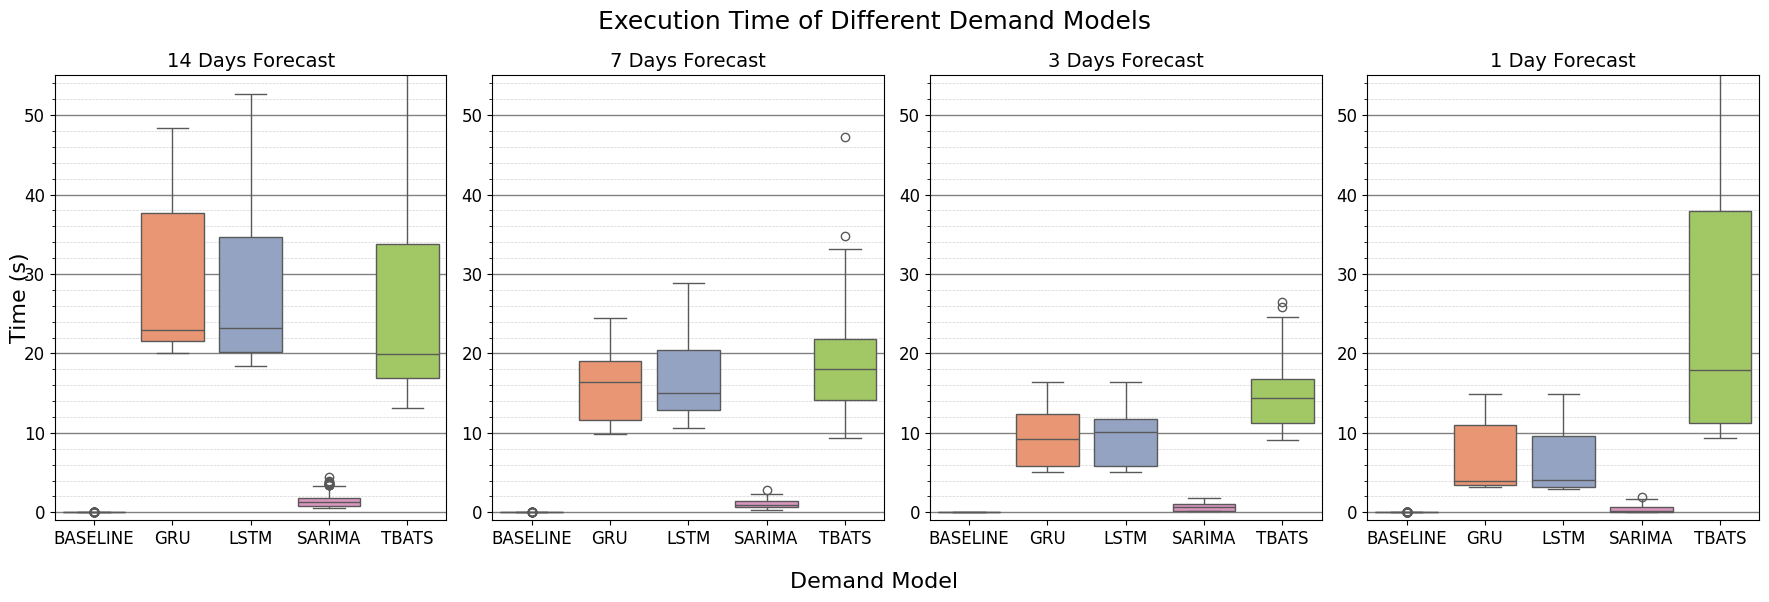

In [6]:
# Execution Time of Different Demand Models

# Initialize subplots for model comparison across forecast periods
n_forecast_periods = len(data_locations)
fig, axes = plt.subplots(1, len(data_locations), figsize=(18, 6))

# Iterate over each forecast period for model comparison
for i, forecast_period in enumerate(data_locations.keys()):
    ax = axes[i]
    # Filter data for the current forecast period
    period_df = combined_df[combined_df['Forecast Period'] == forecast_period]

    # Draw box plots for model comparison with uniform color palette
    sns.boxplot(data=period_df, x='Model', y='Time', hue='Model', palette='Set2', ax=ax)
    
    # Set tighter y-axis scale
    ax.set_ylim(-1, 55)

    # Enable minor ticks
    ax.minorticks_on()

    # Set grid lines
    ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
    ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Customize and display the plot
    ax.set_title(f'{forecast_period}', fontsize=14)

    # Remove X and Y labels from all subplots
    ax.set_xlabel('')
    ax.set_ylabel('')
 
# Updating labels and tick parameters
fig.suptitle("Execution Time of Different Demand Models", fontsize=18)
fig.supylabel('Time (s)', fontsize=16)
fig.supxlabel('Demand Model', fontsize=16)
fig.set_facecolor('white')

# Adjust layout to make space for the overall title
plt.tight_layout()

# Check if the target directory exists
target_dir = '../../visualisations/execution_time'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# Define the file name and save the plot
file_name = os.path.join(target_dir, f'all_demand_models_execution_time.png')
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.5)

# Display the plot
plt.show()



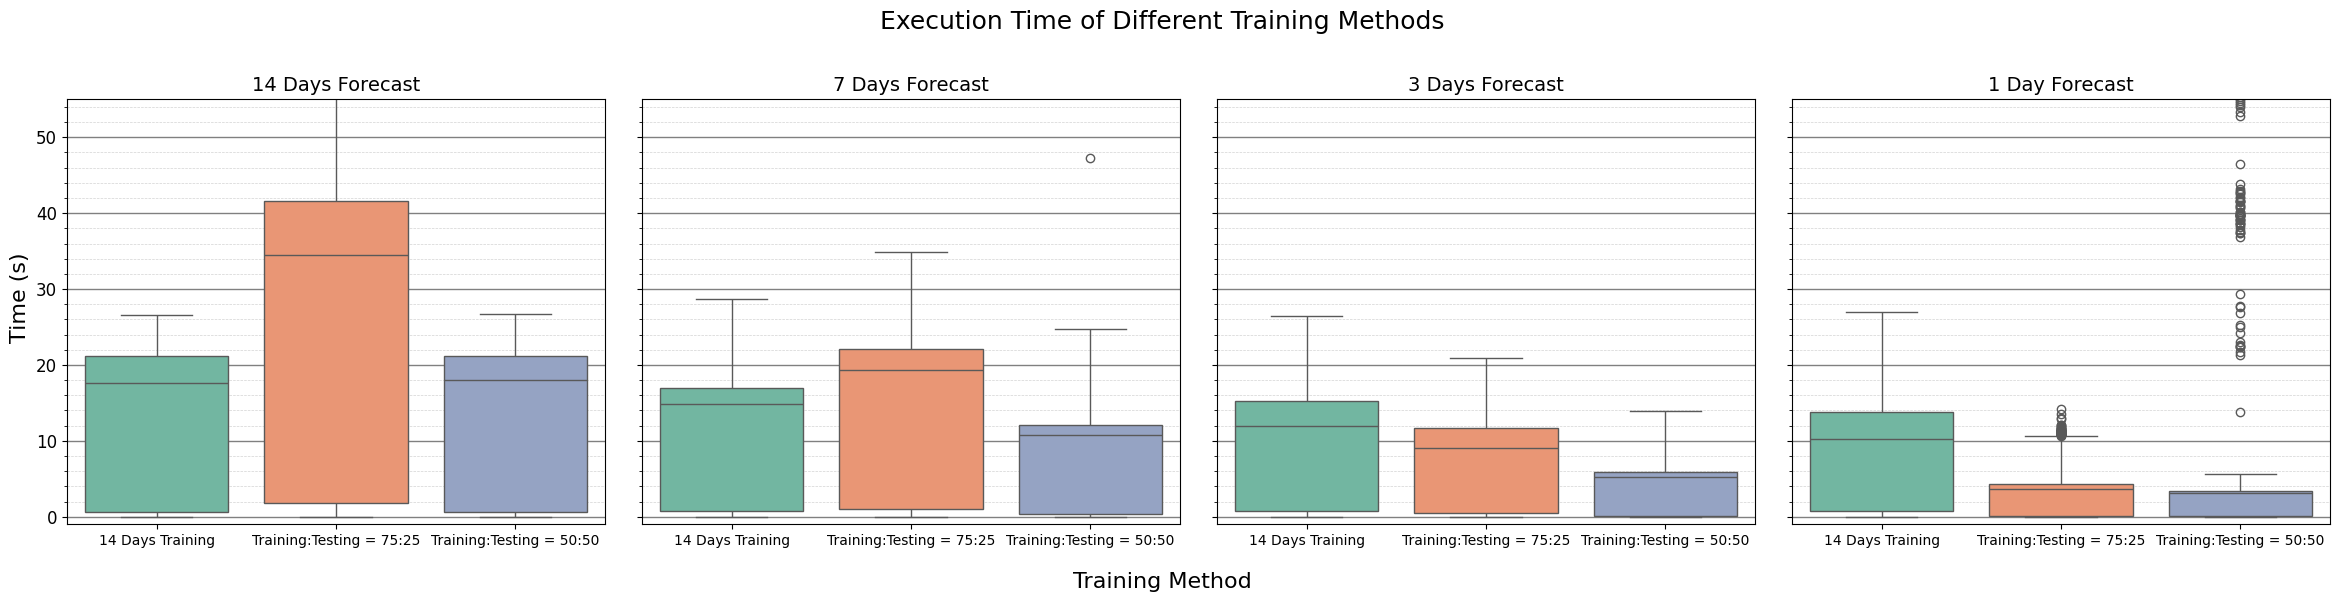

In [7]:
# Execution Time of Different Training Methods

# Initialize subplots for model comparison across forecast periods
n_forecast_periods = len(data_locations)
fig, axes = plt.subplots(1, n_forecast_periods, figsize=(6 * n_forecast_periods, 6), sharey=True)

# Iterate over each forecast period for model comparison
for i, forecast_period in enumerate(data_locations.keys()):
    ax = axes[i]
    period_df = combined_df[(combined_df['Forecast Period'] == forecast_period) & (combined_df['Metric'] == 'Time(s)')]

    # Draw box plots for model comparison with uniform color palette
    sns.boxplot(data=period_df, x='Training Method', y='Time', hue='Training Method', palette='Set2', ax=ax)
 
    # Set tighter y-axis scale
    ax.set_ylim(-1, 55)
    
    # Enable minor ticks
    ax.minorticks_on()

    # Set grid lines
    ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
    ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.tick_params(axis='x', labelsize=10) 
    ax.tick_params(axis='y', labelsize=12) 

    # Customize and display the plot
    ax.set_title(f'{forecast_period}', fontsize=14)

    # Remove X and Y labels from all subplots
    ax.set_xlabel('')
    ax.set_ylabel('')
 
# Updating labels and tick parameters
fig.suptitle("Execution Time of Different Training Methods", fontsize=18)
fig.supylabel('Time (s)', fontsize=16)
fig.supxlabel('Training Method', fontsize=16)
fig.set_facecolor('white')
plt.tight_layout(rect=[0.01, 0, 1, 0.96])

# Check if the target directory exists
target_dir = '../../visualisations/execution_time'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# Define the file name and save the plot
file_name = os.path.join(target_dir, f'all_training_methods_execution_time.png')
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.5)

# Display the plot
plt.show()

